# 연습문제(2)

# 기술통계 연습문제 (2)

Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

> https://data.hossam.kr/D02/wage.xlsx

| year | age  | maritl           | race     | education       | region             | jobclass       | health         | health_ins | logwage | wage  |
|------|------|------------------|----------|-----------------|--------------------|----------------|----------------|------------|---------|-------|
| 2006 | 18.0 | 1. Never Married | 1. White | 1. < HS Grad    | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 2. No      | 4.3     | 75.0  |
| 2004 | 24.0 | 1. Never Married | 1. White | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 2. No      | 4.3     | 70.5  |
| 2003 | 45.0 | 2. Married       | 1. White | 3. Some College | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 1. Yes     | 4.9     | 131.0 |
| 2003 | 43.0 | 2. Married       | 3. Asian | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 1. Yes     | 5.0     | 154.7 |
| 2005 | 50.0 | 4. Divorced      | 1. White | 2. HS Grad      | 2. Middle Atlantic | 2. Information | 1. <=Good      | 1. Yes     | 4.3     | 75.0  |

각 변수는 다음과 같은 의미를 갖는다.

| 변수명 | 의미 |
|--|--|
| year | 조사년도? |
| age | 나이 |
| maritl | 결혼여부 |
| race | 근로자의 인종 |
| education | 교육수준 |
| region | 지역 |
| jobclass | 직군 |
| health | 건강상태 |
| health_ins | 건강보험 가입 여부 |
| logwage | 임금(로그값) |
| wage | 임금 |

In [81]:
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [82]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [83]:
df = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [84]:
df1 = df.rename(
    columns={'year':'탄생년도','age':'나이','maritl':'결혼여부','race':'근로자의인종','education':'교육수준','region':'지역','jobclass':'직군','health':'건강상태',
             'health_ins':'건강보험가입여부','logwage':'임금(로그)','wage':'임금'},
)
df1

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


1. 데이터를 로드하여 명목형 변수를 `1`, `2` 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

In [85]:
df1.dtypes

탄생년도          int64
나이            int64
결혼여부         object
근로자의인종       object
교육수준         object
지역           object
직군           object
건강상태         object
건강보험가입여부     object
임금(로그)      float64
임금          float64
dtype: object

In [86]:
df1['결혼여부'] = df1['결혼여부'].str.extract(r'(\d+)')
df1['근로자의인종'] = df1['근로자의인종'].str.extract(r'(\d+)')
df1['교육수준'] = df1['교육수준'].str.extract(r'(\d+)')
df1['지역'] = df1['지역'].str.extract(r'(\d+)')
df1['직군'] = df1['직군'].str.extract(r'(\d+)')
df1['건강상태'] = df1['건강상태'].str.extract(r'(\d+)')
df1['건강보험가입여부'] = df1['건강보험가입여부'].str.extract(r'(\d+)')
df1

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


2. 레이블링 된 명목형 변수를 `category` 타입으로 변경하시오.

In [87]:
df2 = df1.astype({'결혼여부':'category','근로자의인종':'category','교육수준':'category','지역':'category','직군':'category','건강상태':'category','건강보험가입여부':'category'})
df2.dtypes
# d2_dtype = DataFrame(data=df2.dtypes)
# #d2_dtype.set_index()
# df.index.name = '구분'
# d2_dtype


탄생년도           int64
나이             int64
결혼여부        category
근로자의인종      category
교육수준        category
지역          category
직군          category
건강상태        category
건강보험가입여부    category
임금(로그)       float64
임금           float64
dtype: object

3. 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [88]:
# 열단위 필터링
f1 = df2.filter(['탄생년도','나이','임금(로그)','임금'])
f1.describe()

,탄생년도,나이,임금(로그),임금
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


미국의 경제 및 노동 시장을 3000건의 데이터로 확인해봤을때,
조사 대상자의 평균 나이는 42세로 평균 급여는 111달러

4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

In [89]:
# 열단위 필터링
f2 = df2.filter(['결혼여부','근로자의인종','교육수준','지역','직군','건강상태','건강보험가입여부'])
f2

,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부
0,1,1,1,2,1,1,2
1,1,1,4,2,2,2,2
2,2,1,3,2,1,1,1
3,2,3,4,2,2,2,1
4,4,1,2,2,2,1,1
...,...,...,...,...,...,...,...
2995,2,1,3,2,1,2,1
2996,2,1,2,2,1,2,2
2997,2,2,1,2,1,1,2
2998,1,1,3,2,1,2,1


In [90]:
f2.describe()

,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부
count,3000,3000,3000,3000,3000,3000,3000
unique,5,4,5,1,2,2,2
top,2,1,2,2,1,2,1
freq,2074,2480,971,3000,1544,2142,2083


In [91]:
결혼방식 = list(set(list(df['maritl'])))
결혼 = []
for i in range(len(결혼방식)) :
    결혼.append(결혼방식[i][3:])
결혼

['Widowed', 'Never Married', 'Divorced', 'Separated', 'Married']

5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [120]:
df3 = df2.astype({'결혼여부':'float32','교육수준':'float32','근로자의인종':'float32'})
df3.dtypes

탄생년도           int64
나이             int64
결혼여부         float32
근로자의인종       float32
교육수준         float32
지역          category
직군          category
건강상태        category
건강보험가입여부    category
임금(로그)       float64
임금           float64
dtype: object

In [93]:
# hist1, bins1 = np.histogram(df3['결혼여부'], bins=5)
# bins1 = np.round(bins1, 1)
bins1 = np.array([1,2,3,4,5])
bins1

array([1, 2, 3, 4, 5])

In [94]:
hist2, bins2 = np.histogram(df3['임금'], bins=5)
bins2 = np.round(bins2, 1)
bins2

array([ 20.1,  79.7, 139.4, 199. , 258.7, 318.3])

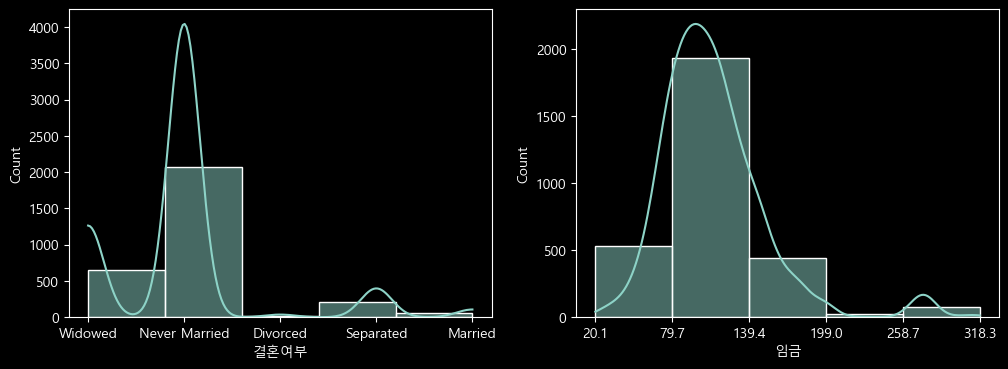

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df3, x="결혼여부", bins=5, ax=ax1, kde=True)
sb.histplot(data=df3, x="임금", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(결혼)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [96]:
교육1 = list(set(list(df['education'])))
교육2 = []
for i in range(len(교육1)) :
    교육2.append(교육1[i][3:])
교육2

['< HS Grad', 'College Grad', 'HS Grad', 'Some College', 'Advanced Degree']

In [97]:
bins1 = np.array([1,2,3,4,5])
bins1

array([1, 2, 3, 4, 5])

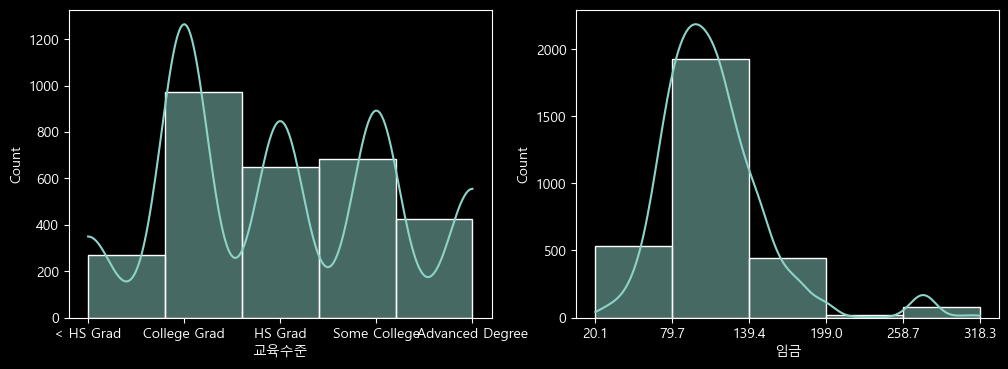

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df3, x="교육수준", bins=5, ax=ax1, kde=True)
sb.histplot(data=df3, x="임금", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(교육2)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

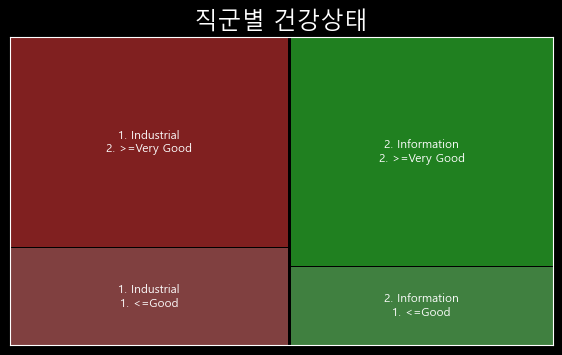

In [105]:
mosaic(df,['jobclass','health'], axes_label=False)
plt.title('직군별 건강상태',fontsize=17)
plt.show()
plt.close()

산업 직군 종사자는 정보 직군 종사자보다 건강 상태가 좋지 않다. 역시 화이트 칼라.

8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.


In [121]:
df3

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1.0,1.0,1.0,2,1,1,2,4.318063,75.043154
1,2004,24,1.0,1.0,4.0,2,2,2,2,4.255273,70.476020
2,2003,45,2.0,1.0,3.0,2,1,1,1,4.875061,130.982177
3,2003,43,2.0,3.0,4.0,2,2,2,1,5.041393,154.685293
4,2005,50,4.0,1.0,2.0,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2.0,1.0,3.0,2,1,2,1,5.041393,154.685293
2996,2007,30,2.0,1.0,2.0,2,1,2,2,4.602060,99.689464
2997,2005,27,2.0,2.0,1.0,2,1,1,2,4.193125,66.229408
2998,2005,27,1.0,1.0,3.0,2,1,2,1,4.477121,87.981033


In [113]:
인종1 = list(set(list(df['race'])))
인종 = []
for i in range(len(인종1)) :
    인종.append(인종1[i][3:])
인종

['Black', 'Asian', 'White', 'Other']

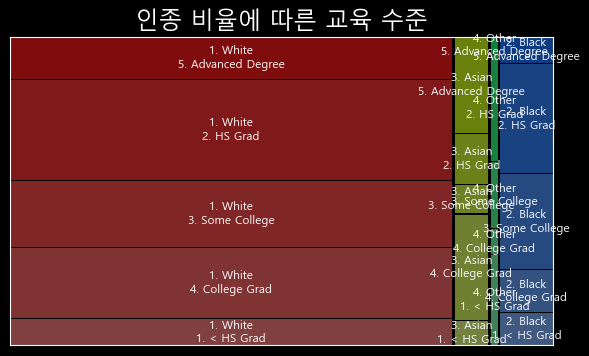

In [126]:
mosaic(df,['race','education'], axes_label=False)
plt.title('인종 비율에 따른 교육 수준',fontsize=17)
plt.show()
plt.close()